In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import nltk

In [62]:
import io
%cd "C:\Users\sande\OneDrive\Desktop\New folder (2)"

C:\Users\sande\OneDrive\Desktop\New folder (2)


In [63]:
imdb_reviews=pd.read_excel("imdb.xlsx")

In [64]:
imdb_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [65]:
imdb_reviews[['Revenue (Millions)','Metascore']].describe()

,Revenue (Millions),Metascore
count,872.000000,936.000000
mean,82.956376,58.985043
std,103.253540,17.194757
min,0.000000,11.000000
25%,13.270000,47.000000
50%,47.985000,59.500000
75%,113.715000,72.000000
max,936.630000,100.000000


In [66]:
nacols=['Revenue (Millions)','Metascore']

In [67]:
for col in nacols:
    imdb_reviews[col]=imdb_reviews[col].fillna(imdb_reviews[col].median())

In [68]:
# Text Column
imdb_txt=imdb_reviews.Description

In [69]:
imdb_txt.head()

0    A group of intergalactic criminals are forced ...
1    Following clues to the origin of mankind, a te...
2    Three girls are kidnapped by a man with a diag...
3    In a city of humanoid animals, a hustling thea...
4    A secret government agency recruits some of th...
Name: Description, dtype: object

In [70]:
imdb_txt=imdb_txt.str.lower()

In [71]:
imdb_txt.head()

0    a group of intergalactic criminals are forced ...
1    following clues to the origin of mankind, a te...
2    three girls are kidnapped by a man with a diag...
3    in a city of humanoid animals, a hustling thea...
4    a secret government agency recruits some of th...
Name: Description, dtype: object

In [72]:
from nltk.corpus import stopwords

In [73]:
stop_english=set(stopwords.words("english"))

In [74]:
from nltk.tokenize import word_tokenize

In [75]:
imdb_txt=imdb_txt.apply(word_tokenize)

In [76]:
imdb_txt=imdb_txt.apply(lambda x:[w for w in x if w not in stop_english])

In [77]:
imdb_txt.head()

0    [group, intergalactic, criminals, forced, work...
1    [following, clues, origin, mankind, ,, team, f...
2    [three, girls, kidnapped, man, diagnosed, 23, ...
3    [city, humanoid, animals, ,, hustling, theater...
4    [secret, government, agency, recruits, dangero...
Name: Description, dtype: object

In [78]:
from wordcloud import WordCloud

In [79]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stop_english).generate(str(imdb_txt))

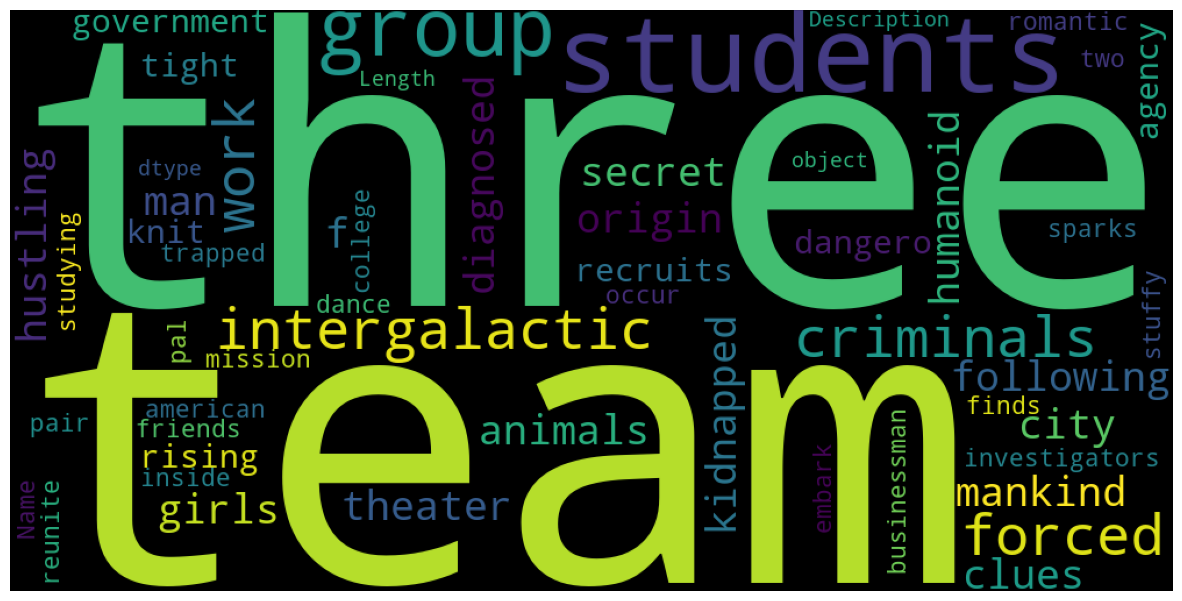

In [80]:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [81]:
imdb_words=imdb_txt.to_list()

In [82]:
from nltk import flatten

In [83]:
imdb_words=flatten(imdb_words)

In [84]:
imdb_words=[ w for w in imdb_words if len(w)>2]

In [85]:
imdb_words=[ w for w in imdb_words if not w in ['...','u.s.']]

In [86]:
from nltk.probability import FreqDist

In [87]:
FreqDist(imdb_words).most_common(100)

[('young', 127),
 ('new', 106),
 ('life', 101),
 ('world', 95),
 ('two', 80),
 ('man', 79),
 ('must', 69),
 ('family', 66),
 ('woman', 63),
 ('one', 62),
 ('story', 56),
 ('find', 55),
 ('finds', 52),
 ('love', 52),
 ('friends', 51),
 ('mysterious', 49),
 ('group', 48),
 ('home', 46),
 ('school', 44),
 ('girl', 44),
 ('father', 39),
 ('war', 39),
 ('team', 38),
 ('lives', 38),
 ('help', 38),
 ('order', 37),
 ('back', 36),
 ('years', 35),
 ('city', 33),
 ('becomes', 33),
 ('together', 32),
 ('agent', 32),
 ('wife', 31),
 ('three', 30),
 ('save', 30),
 ('become', 30),
 ('former', 30),
 ('take', 30),
 ('discover', 30),
 ('american', 29),
 ('time', 29),
 ('takes', 28),
 ('boy', 28),
 ('high', 28),
 ('mother', 28),
 ('son', 28),
 ('friend', 28),
 ('fight', 27),
 ('get', 27),
 ('forced', 26),
 ('mission', 26),
 ('best', 25),
 ('daughter', 25),
 ('journey', 25),
 ('forces', 25),
 ('way', 25),
 ('death', 24),
 ('set', 24),
 ('see', 24),
 ('stop', 23),
 ('past', 23),
 ('full', 23),
 ('town', 23

In [88]:
imdb_txt=imdb_reviews.Description

In [89]:
imdb_txt=pd.DataFrame(imdb_txt,columns=['Description'])

In [118]:
imdb_txt.Description=imdb_txt.Description.apply(lambda x: ' '.join(
    [word for word in x.split() if word not in (stop_english)]))

In [119]:
imdb_txt.Description=imdb_txt.Description.apply(lambda x: ' '.join(
    [word for word in x.split() if len(word)>2]))

In [92]:
from sklearn.feature_extraction.text import CountVectorizer

In [93]:
DTM=CountVectorizer(max_features=100,ngram_range=(3,3))

In [94]:
x_DTM=DTM.fit_transform(imdb_txt.Description)

In [95]:
pd.DataFrame(x_DTM.toarray(),columns=DTM.vocabulary_).head()

,save world apocalypse,out of work,new york city,17 year old,must unite defeat,see full summary,behind enemy lines,earth mightiest heroes,france world war,world war ii,...,prison situated basement,prehistoric man eating,preteen life turns,pregnant second child,presence potential love,presidents tenure butler,pressures life love,pregnant waitress unborn,prescott put back,prison surrounded infected
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
x_DTM=pd.DataFrame(x_DTM.toarray(),columns=DTM.vocabulary_)

In [97]:
imdb_reviews.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [98]:
numcols=imdb_reviews[['Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore']]

In [111]:
numcols.head()

,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,121,8.1,757074,333.13,76.0
1,124,7.0,485820,126.46,65.0
2,117,7.3,157606,138.12,62.0
3,108,7.2,60545,270.32,59.0
4,123,6.2,393727,325.02,40.0


In [100]:
from sklearn.preprocessing import StandardScaler

In [101]:
scalar=StandardScaler()

In [102]:
numcols_scaled=scalar.fit_transform(numcols)

In [103]:
numcols_scaled=pd.DataFrame(numcols_scaled,columns=numcols.columns)

In [104]:
x=pd.concat([x_DTM,numcols_scaled],axis=1)

In [105]:
from sklearn.cluster import KMeans

In [106]:
wcss_list=[]
for i in range(1,25):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(x)
    wcss_list.append(kmeans.inertia_)

C:\Users\sande\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

C:\Users\sande\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

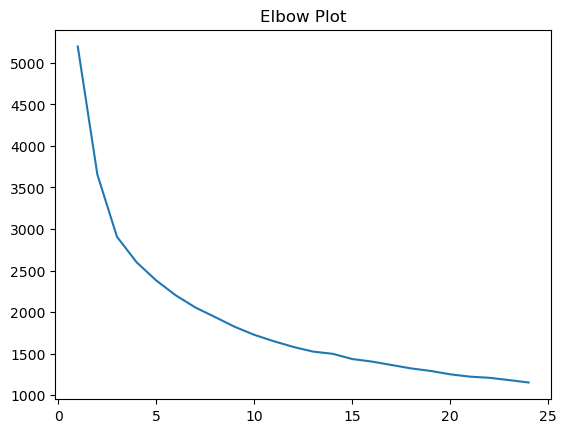

In [107]:
plt.plot(range(1,25),wcss_list)
plt.title('Elbow Plot')
plt.show()

In [108]:
clust4=KMeans(n_clusters=2)

In [109]:
clust4model=clust4.fit(x)

C:\Users\sande\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [112]:
from sklearn.metrics import silhouette_score

In [113]:
silhouette_score(x,clust4model.labels_)

0.3019659855973899

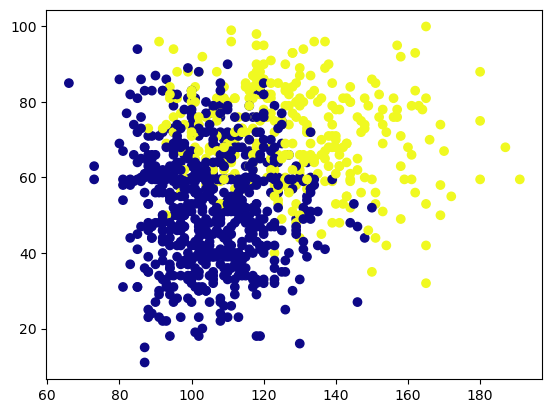

In [114]:
plt.scatter(x=numcols['Runtime (Minutes)'],y=numcols['Metascore'],c=clust4model.labels_,cmap='plasma')

In [115]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics.pairwise import euclidean_distances

In [116]:
x_euclid=euclidean_distances(x)

C:\Users\sande\AppData\Local\Temp\ipykernel_12292\2998201544.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  dendogram=sch.dendrogram(sch.linkage(x_euclid,method="ward"),orientation='left',labels=imdb_reviews.Title.values.tolist(),p=200)


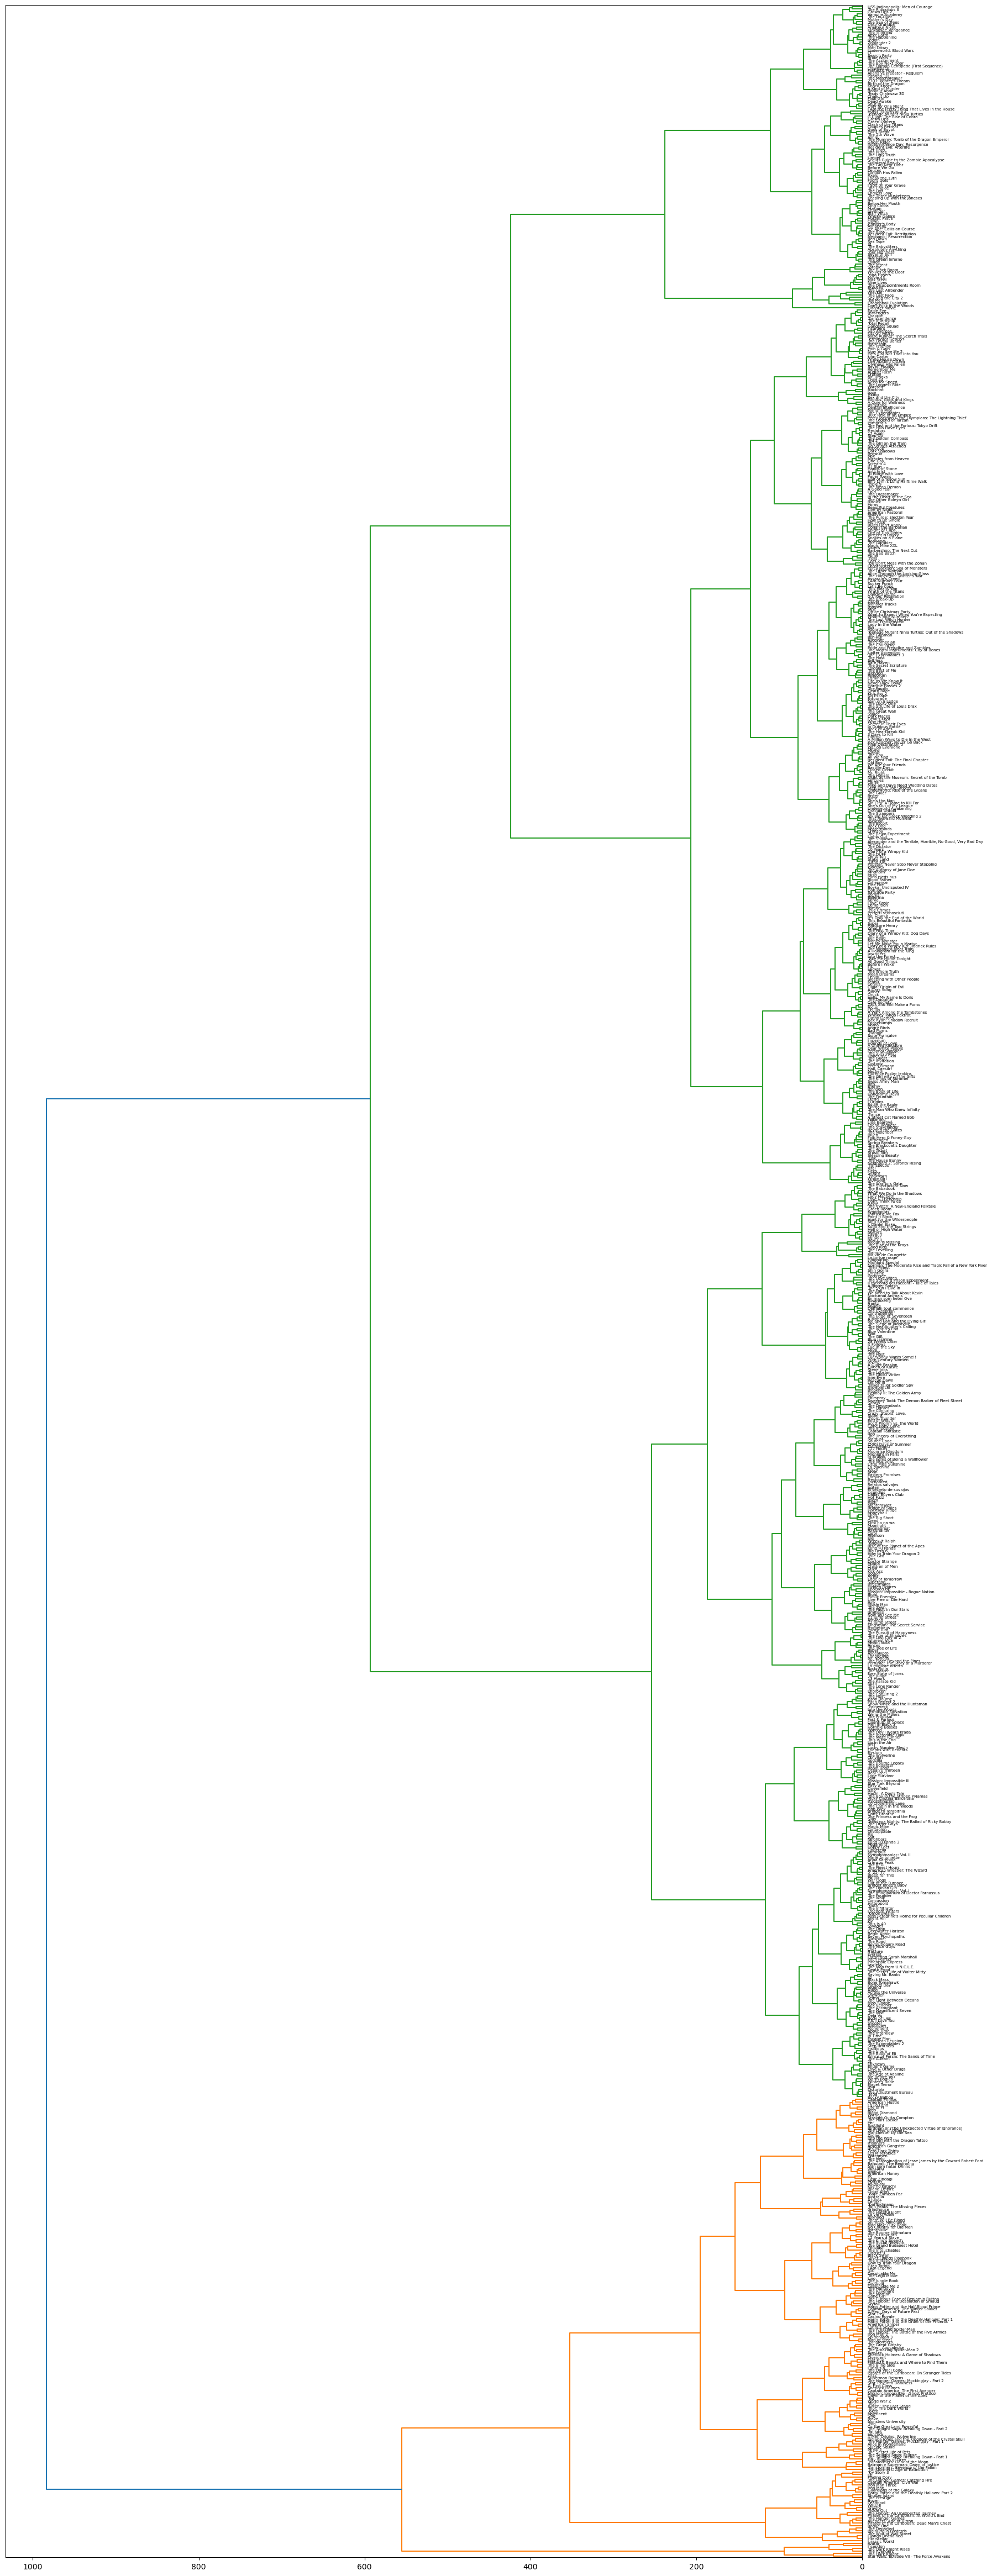

In [117]:
plt.figure(figsize=(20,60))
dendogram=sch.dendrogram(sch.linkage(x_euclid,method="ward"),orientation='left',labels=imdb_reviews.Title.values.tolist(),p=200)